#**Autoregression for Time Series Forecasting**

***Prepared by:*** [**Manisa Pipattanasomporn**](https://mpipatta.github.io)

*Created: January 1, 2020*

Autoregression is a linear regression model that uses lagged variables as inputs to predict the value at the next time step. Example:
* yhat = a0 + a1 * X1
* yhat = b0 + b1 * X(t-1) + b2 * X(t-2)

In this tutorial, we will use AR model to perform 24-hour prediction. AR model automatically choses optimal lagged values for prediction. 

**Note:** Look back forecasting is a special type of autoregression model. 

---


# **1. Load data**

Similar to the lookback example, this notebook will work with "Bangkok.csv", the electrical consumption of a building at one-hour intervals for one year. 

In [0]:
# We will use the following Python libraries: Pandas, Numpy and Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
url ='https://raw.githubusercontent.com/mpipatta/mpipatta.github.io/master/testdata/Bangkok.csv'
df = pd.read_csv(url, index_col=[0], parse_dates=[0])[['Load']]
df.head(5)
#We will parse the first column (col=[0]) as the index column as the date. 
#The 'Load' column will be saved in the dataframe df.
#Note: the 'Load' is in kilo-Watt (kW).

,Load
Time,
2016-01-01 00:00:00,4.30
2016-01-01 01:00:00,4.12
2016-01-01 02:00:00,4.06
2016-01-01 03:00:00,4.44
2016-01-01 04:00:00,3.88



---


#**2. Data Exploration**

Let us now visualize the data.

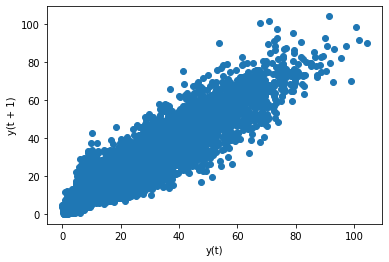

In [0]:
from pandas.plotting import lag_plot
lag_plot(df)

In [0]:
df1 = pd.concat([df.shift(4), df.shift(3), df.shift(2), df.shift(1), df], axis=1)
df1.columns = ['Lt-4','Lt-3','Lt-2','Lt-1', 'Lt']
df1.head()

,Lt-4,Lt-3,Lt-2,Lt-1,Lt
Time,,,,,
2016-01-01 00:00:00,NaN,NaN,NaN,NaN,4.30
2016-01-01 01:00:00,NaN,NaN,NaN,4.30,4.12
2016-01-01 02:00:00,NaN,NaN,4.30,4.12,4.06
2016-01-01 03:00:00,NaN,4.30,4.12,4.06,4.44
2016-01-01 04:00:00,4.3,4.12,4.06,4.44,3.88


In [0]:
#we can expect lower correlation with time
df1.corr()

,Lt-4,Lt-3,Lt-2,Lt-1,Lt
Lt-4,1.000000,0.946874,0.839107,0.699901,0.539099
Lt-3,0.946874,1.000000,0.946878,0.839120,0.699924
Lt-2,0.839107,0.946878,1.000000,0.946882,0.839132
Lt-1,0.699901,0.839120,0.946882,1.000000,0.946887
Lt,0.539099,0.699924,0.839132,0.946887,1.000000


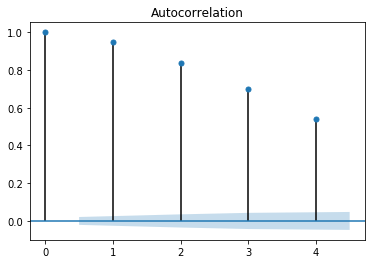

In [0]:
#We can also visualize autocorrelation using statsmodels library
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df, lags=4)
plt.show()



---


#**3. Autoregression Model**

To create the AR model, we create the model AR(). Then, we call fit() to train it on the dataset.


###**(a) AR Concept**

In [0]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

X = df.values
X

array([[4.3 ],
       [4.12],
       [4.06],
       ...,
       [3.5 ],
       [3.5 ],
       [3.88]])

In [0]:
#here we will use AR to do 24-hour ahead forecasting
#training data = hourly data up to "day"
#testing data = the next 24 hours
day=292
train = X[1:day*24] 
test  = X[day*24:(day+1)*24]

In [0]:
# AR automatically chooses optimal lag values
# The list of coefficients is then printed in the trained linear regression model.
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 35
Coefficients: [ 1.52706151e+00  1.25744754e+00 -3.23426225e-01  5.98221542e-02
 -9.28587477e-02  1.42187307e-02  3.62689182e-02 -4.16921368e-02
 -7.05110174e-02  4.98954545e-03  4.66537906e-02 -1.70797464e-02
  2.42917542e-02 -1.62678153e-02  2.44161270e-02  4.95397995e-03
 -5.26488152e-02  5.64572919e-02 -3.94096154e-02 -3.43756479e-02
  4.60533210e-02  6.03353536e-02 -2.65497743e-02  6.08245506e-02
  1.53890601e-01 -1.89617239e-01 -3.62463585e-02  3.16188127e-02
 -5.16178099e-02  5.08430478e-04  7.10451133e-02 -2.20471905e-02
 -1.99944198e-02  4.47550722e-02 -3.26789828e-03 -3.81739004e-02]


In [0]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
for i in range(len(predictions)):
 	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
RMSE = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % RMSE)

predicted=6.236350, expected=6.250000
predicted=4.226021, expected=4.880000
predicted=3.403134, expected=5.620000
predicted=4.913008, expected=4.250000
predicted=7.691960, expected=4.500000
predicted=10.326779, expected=5.120000
predicted=14.273653, expected=7.880000
predicted=21.324424, expected=19.620000
predicted=27.650173, expected=28.620000
predicted=31.640401, expected=45.000000
predicted=34.823628, expected=44.750000
predicted=37.212319, expected=37.250000
predicted=38.138692, expected=33.000000
predicted=40.656069, expected=43.250000
predicted=44.417525, expected=52.500000
predicted=43.323128, expected=48.000000
predicted=39.527017, expected=40.880000
predicted=33.808108, expected=28.120000
predicted=25.194001, expected=14.880000
predicted=15.915057, expected=6.120000
predicted=11.410440, expected=5.880000
predicted=9.237301, expected=8.620000
predicted=7.479981, expected=8.570000
predicted=7.134801, expected=8.250000
Test RMSE: 5.609


In [0]:
# RMSE = np.sqrt(np.mean(np.square(test.ravel()-predictions)))
# RMSE

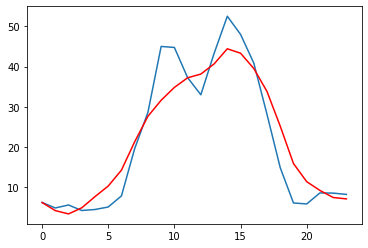

In [0]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

###**(b) Use AR for 24-hour forecasting** 
We can use AR model for 24-hour ahead load forecasting.  The training data are all the data available up to the current day. The testing data are each 24 hours of the last two months of data, days 330-365.

The training data can be limited to 90 days for a faster run.

Notice that AR model depends on the input data from the previous hours. Hence, it cannot capture the changes in weekday/weekend patterns.

In [0]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

X = df.values
X
predict=[]
test1=[]

for day in np.arange(330, 365):
  #create train and test data
  #train = X[1:24*day]   
  train = X[(day-90)*24:day*24] 
  test  = X[day*24:(day+1)*24]

  #crate and fit the model
  model = AR(train)
  model_fit = model.fit()
  
  #make predictions
  predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
  RMSE = np.sqrt(mean_squared_error(test, predictions))
  print('Day:',day, 'Lag:', model_fit.k_ar, 'RMSE:', RMSE)

  #create the predicted/test arrays
  predict = np.concatenate((predict, predictions))
  test1 = np.concatenate((test1, test.ravel()))

overallRMSE = np.sqrt(mean_squared_error(test1, predict))
print('Overall RMSE: %.3f' %overallRMSE)

Day: 330 Lag: 26 RMSE: 14.799580290046267
Day: 331 Lag: 26 RMSE: 9.846016808895627
Day: 332 Lag: 26 RMSE: 14.527418873241968
Day: 333 Lag: 26 RMSE: 4.4020696712345915
Day: 334 Lag: 26 RMSE: 6.8869155241193525
Day: 335 Lag: 26 RMSE: 6.052901631733996
Day: 336 Lag: 26 RMSE: 4.078563894612192
Day: 337 Lag: 26 RMSE: 16.293827880750225
Day: 338 Lag: 26 RMSE: 8.429575953540938
Day: 339 Lag: 26 RMSE: 6.652661537371356
Day: 340 Lag: 26 RMSE: 18.75999209009565
Day: 341 Lag: 26 RMSE: 3.2137949768394964
Day: 342 Lag: 26 RMSE: 4.241138844351481
Day: 343 Lag: 26 RMSE: 6.340407990719648
Day: 344 Lag: 26 RMSE: 18.09048523202953
Day: 345 Lag: 26 RMSE: 9.16229562222162
Day: 346 Lag: 26 RMSE: 5.432936746923985
Day: 347 Lag: 26 RMSE: 12.972276148722687
Day: 348 Lag: 26 RMSE: 6.89162914517785
Day: 349 Lag: 26 RMSE: 3.7925105496122753
Day: 350 Lag: 26 RMSE: 3.899787906660653
Day: 351 Lag: 26 RMSE: 16.840088312354567
Day: 352 Lag: 26 RMSE: 7.949915899233816
Day: 353 Lag: 26 RMSE: 14.315429065679991
Day: 354

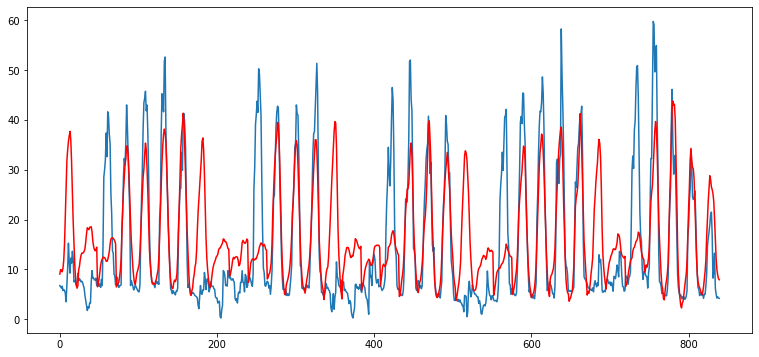

In [0]:
# plot results
plt.figure(figsize=(13,6))
plt.plot(test1)
plt.plot(predict, color='red')
plt.show()

###**(c) Use AR for 1-hour ahead forecasting** 
In this example, we will crate an AR model that performs hour-ahead load forecasting. The training data are all the data available up to the current hour. The testing data are each one hour of the last two months of data.  

Note: the amount of historical data used as inputs can be adjusted accordingly. For example, to use only 90 days of data as input:
*   train = X[1+hour-24*90:hour] 

This will help increase the speed of prediction.


In [0]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

X = df.values
X
predict=[]
test1=[]

for hour in np.arange(330*24, 365*24):
  #creat train and test data
  #train = X[1:hour] 
  train = X[1+hour-24*90:hour]
  test  = X[hour:hour+1]
  
  #crate and fit the model
  model = AR(train)
  model_fit = model.fit()
  
  #make predictions
  predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
  RMSE = np.sqrt(mean_squared_error(test, predictions))
  print('Hour:',hour, 'Lag:', model_fit.k_ar, 'RMSE:', RMSE)

  #create the predicted/test arrays
  predict = np.concatenate((predict, predictions))
  test1 = np.concatenate((test1, test.ravel()))

overallRMSE = np.sqrt(mean_squared_error(test1, predict))
overallMAPE = np.mean(np.abs((test1-predict)/test1))*100

print('Overall RMSE: %.3f' %overallRMSE)
print('Overall MAPE: %.3f' %overallMAPE)

Hour: 7920 Lag: 26 RMSE: 2.3109070031988495
Hour: 7921 Lag: 26 RMSE: 0.46066486104342896
Hour: 7922 Lag: 26 RMSE: 0.1127958388031658
Hour: 7923 Lag: 26 RMSE: 0.5990415688381239
Hour: 7924 Lag: 26 RMSE: 2.071114681355448
Hour: 7925 Lag: 26 RMSE: 1.2508309479677804
Hour: 7926 Lag: 26 RMSE: 3.4286745229583975
Hour: 7927 Lag: 26 RMSE: 5.560066576283845
Hour: 7928 Lag: 26 RMSE: 7.211620869063326
Hour: 7929 Lag: 26 RMSE: 0.7384651602939138
Hour: 7930 Lag: 26 RMSE: 0.6513878958873001
Hour: 7931 Lag: 26 RMSE: 1.05819776251494
Hour: 7932 Lag: 26 RMSE: 8.002260963086218
Hour: 7933 Lag: 26 RMSE: 3.6218595701710843
Hour: 7934 Lag: 26 RMSE: 3.1022490031156273
Hour: 7935 Lag: 26 RMSE: 1.0147596260655227
Hour: 7936 Lag: 26 RMSE: 4.061213524117186
Hour: 7937 Lag: 26 RMSE: 1.3747168130092806
Hour: 7938 Lag: 26 RMSE: 2.6486757259433187
Hour: 7939 Lag: 26 RMSE: 3.574161728640246
Hour: 7940 Lag: 26 RMSE: 0.8572673295449258
Hour: 7941 Lag: 26 RMSE: 0.8950668183951205
Hour: 7942 Lag: 26 RMSE: 0.503012576456

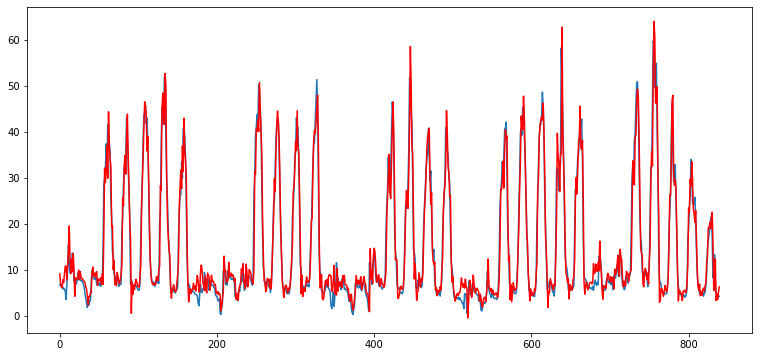

In [0]:
# plot results
plt.figure(figsize=(13,6))
plt.plot(test1)
plt.plot(predict, color='red')
plt.show()



---


# **Further reading:**
* Machinelearningmastery: https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/



---

